<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05 sci-kit learn GridSearchCV
## CSC 401 Lab
## Alex Lagarde
### 2/24/21



In [ ]:
# a
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# b-c
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1izidngrqxWsq-1z-AgOcZIpF5F51CRQr')
df.head(10)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes
5,6,M,18000,20,29,1.7,Action,No
6,7,F,29000,45,19,3.8,Drama,No
7,8,M,74000,25,31,2.4,Action,Yes
8,9,M,38000,21,18,2.1,Comedy,No
9,10,F,65000,40,21,3.3,Drama,No


In [ ]:
# d
y = df['Incidentals']
X = df.drop(['Cust ID','Incidentals'], axis= 1)
X = pd.get_dummies(X)
X = (X - X.min()) / (X.max() - X.min())
xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.3, 
                                                random_state = 0)
model = KNeighborsClassifier(n_neighbors=2 , metric = 'euclidean')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

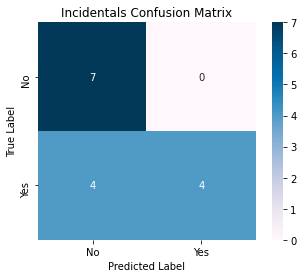

              precision    recall  f1-score   support

          No       0.64      1.00      0.78         7
         Yes       1.00      0.50      0.67         8

    accuracy                           0.73        15
   macro avg       0.82      0.75      0.72        15
weighted avg       0.83      0.73      0.72        15



In [ ]:
# e
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square = True, annot = True, fmt='d',
            cbar = True, cmap="PuBu",
            xticklabels=model.classes_ ,
            yticklabels=model.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Incidentals Confusion Matrix')
plt.show()
# f
print(classification_report(ytest, ypred))

In [ ]:
# g

i) The precision for class 0 or when incidentals are no is 0.64 or 64%. This means when the predicted label is No for incidentals bought, 64% of the time the true label is also No.

ii) The precision value is calculated by the number of predicted No labels that are actually No labels divided by the total number of predicted No labels that are both actually No and actually Yes. 

iii) The recall for class 0 or when incidentals bought are Yes is 0.50 or 50%. This means when the true label is Yes for incidentals, 50% of the time the predicted label or incidental is also Yes.

iiii) The recall value is calculated by the number of actual yes labels that were predicted yes for incidentals bought divided by the the number of actual yes labels that were predicted either Yes or No for incidentals. 

iv) The overall accuracy is 0.73 or 73%

v) The overall accuracy is calculated by the sum of total number of labels that were predicted no and actually no and the total number of labels predicted yes and actually yes. Then, divide that sum by the total number of predictions.

In [ ]:
# h
param_grid = {'n_neighbors' : np.arange(1,26),
              'metric' : ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, param_grid, cv = 5, verbose = 1)
grid.fit(xtrain, ytrain)
grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
# i
model = grid.best_estimator_
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          No       0.88      1.00      0.93         7
         Yes       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



j. The final one nearest neighbor model with a manhattan distance parameter and weights set to uniform outperformed my original model of two nearest neighbors with an euclidean distance parameter and weights set to uniform. The final model had an accuracy score of 93% compared to 73% in the original model. 

k. If we use training data to test our model, our accurary score would be skewed higher. Since we would have learned our model with the training data, obviously the training data will do a better job evaluating its predictability compared to testing data that can help generalize the model to the real world. 

